# 7. 训练感知器

- [7.1 定义感知器](#1)
- [7.2 激活函数](#2)
- [7.3 训练函数](#3)
- [7.4 反向传播](#4)
- [7.5 开始训练](#5)

<a name='1'></a>
## 7.1 定义感知器

创建一个感知器类。可以任意命名（如：Perceptron - 感知器）。

让感知器类接受两个参数：

输入数据数量（count）
学习率（lrate）。
将默认学习率设置为 0.00001。

然后为每个输入创建介于 -1 和 1 之间的随机权重。

In [21]:
import matplotlib.pyplot as plt
import numpy as np

class Perceptron:
    def __init__(self, count, lrate = 0.000001) -> None:
        self.input_count = count
        self.learning_rate = lrate
        
        self.bias = 1.0
        self.weights = np.random.sample(count+1)*2 - 1
        
    def __str__(self) -> str:
        return f'Perceptron: {self.bias}|{self.weights}'
    
    def activiate(self, inputs):
        sum = self.weights*inputs
        if sum.sum() > 0:
            return 1
        else:
            return 0

    def train(self, inputs, desired):
        _inputs = inputs
        _inputs.append(self.bias)
        err = desired - self.activiate(np.array(_inputs))
        if err != 0:
            self.weights += self.learning_rate * err * np.array(_inputs)

<style>
.header {
  color: #111111;
  background-color: #D9EEE1;
  padding: 20px;
}
.notes {
  color: #111111;
  background-color: #FFFFCC;
  padding: 20px;
}
.important {
  color: red;
}
</style>


<div class=notes>

**随机权重**

感知器将以每个输入的随机权重开始。

**学习率**

对于每个错误，在训练感知器时，权重将以一小部分进行调整。

这个小部分就是“感知器的学习率”。

在感知器对象中，我们称之为 learning_rate。

**偏差**

有时，如果两个输入都为零，感知器可能会产生错误的输出。

为了避免这种情况，我们给感知器一个值为 1 的额外输入。

这称为偏差。</div>

<a name='2'></a>
## 7.2 激活函数

记住感知器算法：

1. 将每个输入与感知器的权重相乘
2. 将结果相加
3. 计算结果

激活函数将输出：

如果总和大于 0，则输出 1

如果总和小于 0，则输出 0

<a name='3'></a>
## 7.3 训练函数

训练函数根据激活函数预测结果。

每次预测错误时，感知器都应该调整权重。

经过多次预测和调整后，权重就会趋向正确的值。

<a name='4'></a>
## 7.4 反向传播

在上述训练过程中，每次预测错误后，感知器都会计算预测的错误程度，如果预测错误，感知器会调整偏差和权重，以便下次预测会更正确一些。

这种学习称为反向传播。

尝试（几千次）后，您的感知器将变得非常擅长预测。

<a name='5'></a>
## 7.5 开始训练

训练1000轮后输出新的权重并对数据进行测试。

random weights: [ 0.54274236 -0.12994615 -0.40054554]
Perceptron: 1.0|[-0.01223364  0.00992285 -0.40154154] trained weights: [ -1.23287545   1.         -40.46633627]


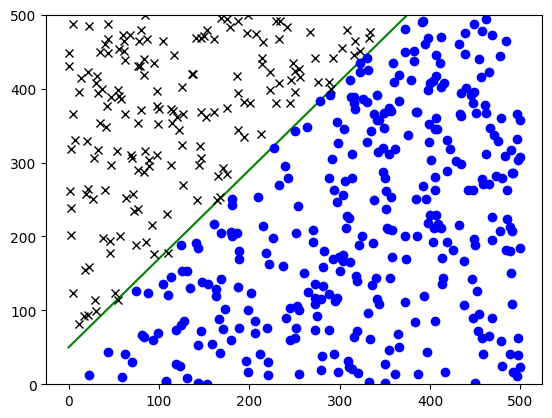

In [24]:
points_count = 500
data = np.random.randint(points_count, size=(2, points_count))

def func(x):
    return 1.2*x + 50

desired = []

for i in range(points_count):
    if(data[1][i] > func(data[0][i])):
        desired.append(1)
    else:
        desired.append(0)

x = np.arange(0, points_count, 1)
y = func(x)
plt.plot(x, y, color='green')
plt.ylim(0, points_count)

p = Perceptron(2)
print("random weights:", p.weights)

# start training 1000 times.
for t in range(1000):
    for n in range(points_count):
        p.train([data[0][n], data[1][n]], desired[n])
        
print(p, "trained weights:", p.weights/p.weights[1])
 
for i in range(points_count):
    if p.activiate(np.array([data[0][i], data[1][i], p.bias])) == 1:
        plt.plot(data[0][i],data[1][i],'x', color = "black")
    else:
        plt.plot(data[0][i],data[1][i],'o', color = "blue")
    